# Exemple construction ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_row",111)#Pour visualiser l'ensemble des colonnes
pd.set_option("display.max_column",111)#Pour visualiser l'ensemble des colonnes

In [3]:
data =pd.read_csv("dataset.csv", sep=";")
data.head()


Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

# Exploration des données

In [4]:
df = data.copy()

float64    70
object     37
int64       4
dtype: int64

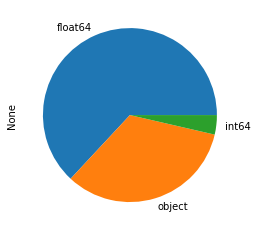

In [5]:
df.dtypes.value_counts().plot.pie()
df.dtypes.value_counts()

<AxesSubplot:>

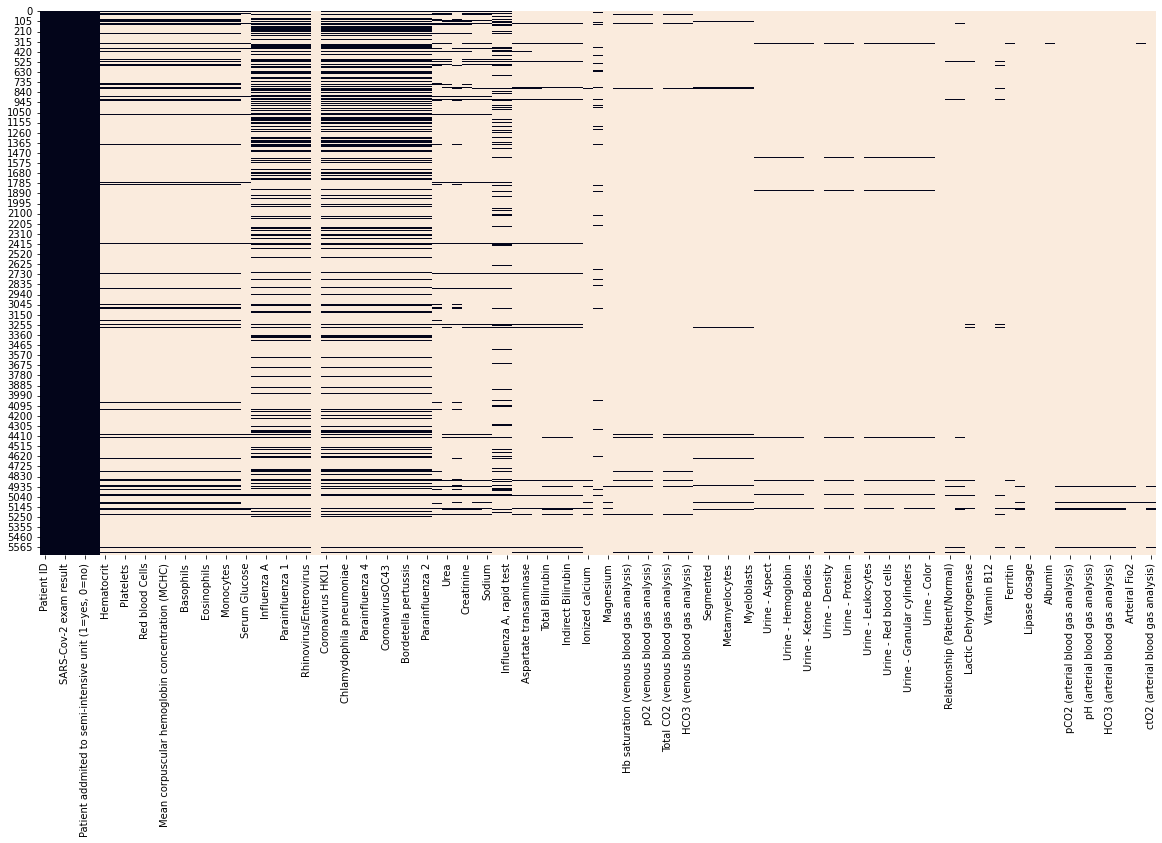

In [6]:
#Analyse de NaN
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False) #En blanc valeurs manquantes en noirs valeurs présentent
#LEs variables qui forment des lignes sont surement en relation

In [7]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)#Voir le % de variables manquantes

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

# Analyse de Fond

In [8]:
# Visualisation initiale - Elimination des colonnes inutiles

In [9]:
df= df[df.columns[df.isna().sum()/df.shape[0]<0.9]]

<AxesSubplot:>

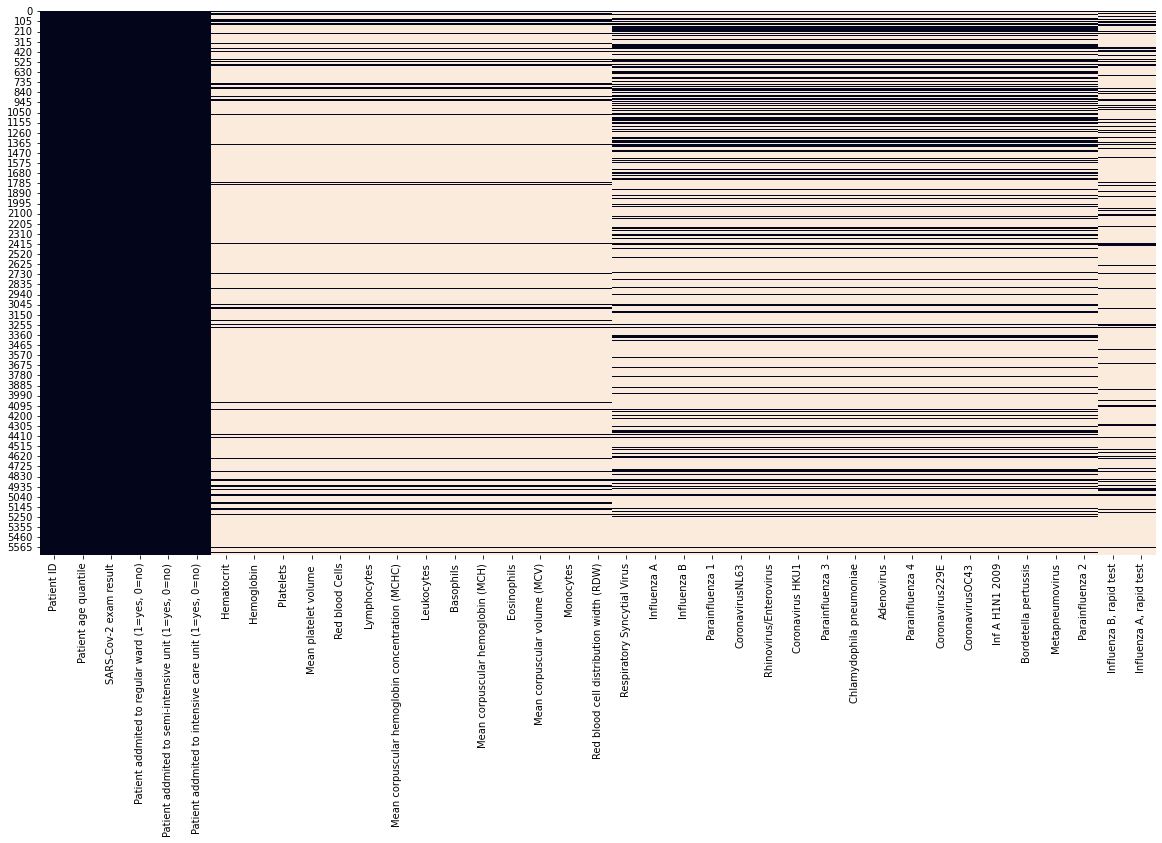

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [11]:
df=df.drop("Patient ID",axis=1)

# Examen de la colonne target

In [12]:
df["SARS-Cov-2 exam result"].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

In [13]:
#Histogrames des variables continues

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

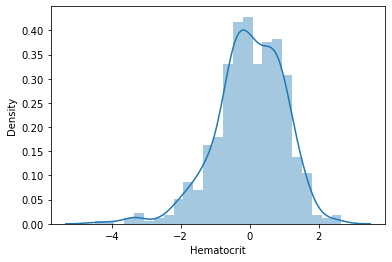

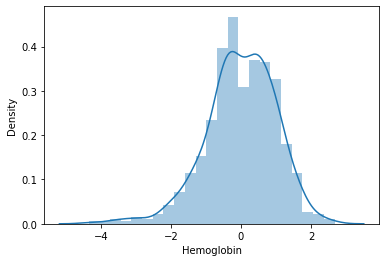

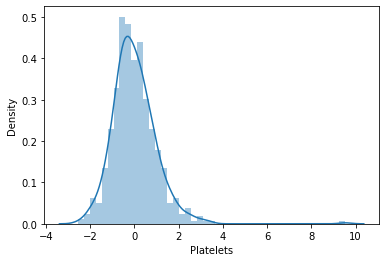

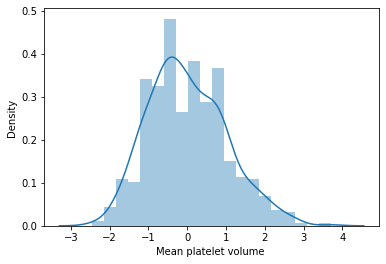

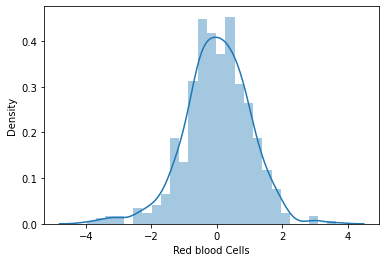

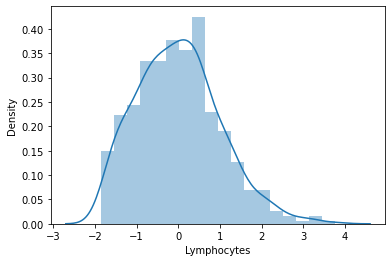

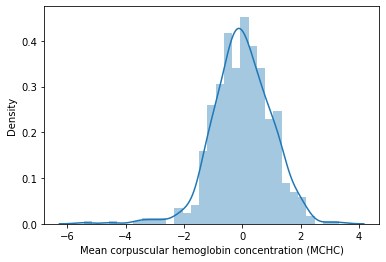

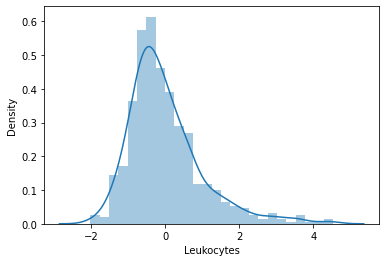

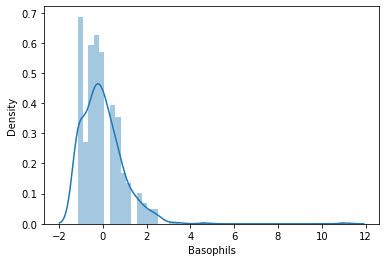

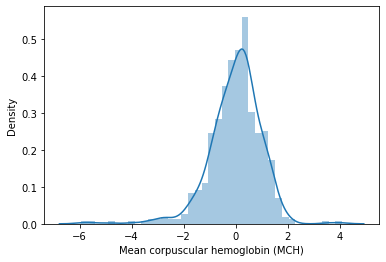

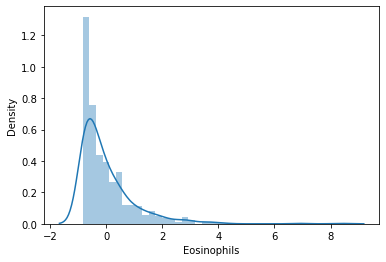

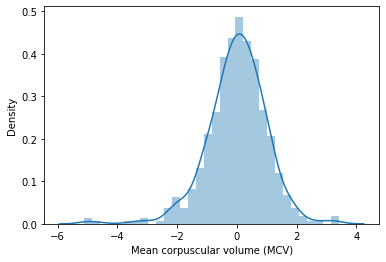

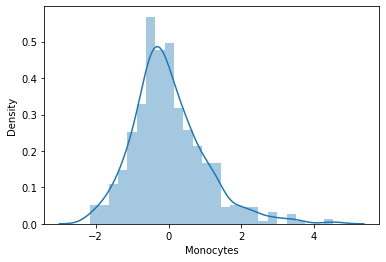

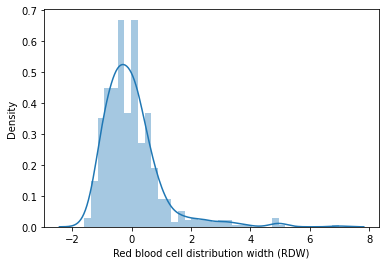

In [14]:
for col in df.select_dtypes("float"):
    plt.figure()
    sns.distplot(df[col])

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


"Difficile d'interpréter ce graphe, les données ont été traitées, on pourrait penser 0-5, mais cela\n pourrait être une transfo mathématiques."

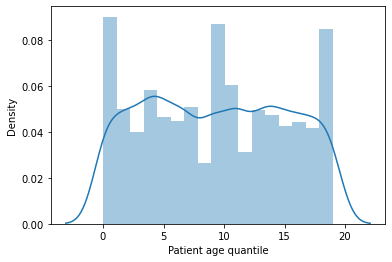

In [15]:
sns.distplot(df["Patient age quantile"])
"""Difficile d'interpréter ce graphe, les données ont été traitées, on pourrait penser 0-5, mais cela
 pourrait être une transfo mathématiques."""

In [16]:
df["Patient age quantile"].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

In [17]:
#Variables Qualitatives/discrètes

In [18]:
for col in df.select_dtypes("object"):
    print(f"{col :-<50}{df[col].unique()}")

SARS-Cov-2 exam result----------------------------['negative' 'positive']
Respiratory Syncytial Virus-----------------------[nan 'not_detected' 'detected']
Influenza A---------------------------------------[nan 'not_detected' 'detected']
Influenza B---------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------[nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------[nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------[nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------[nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------[nan 'not_detected' 'detected']
Adenovirus----------------------------------------[nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------[nan 'not_detected' 'detected']
Coronavirus229E---------

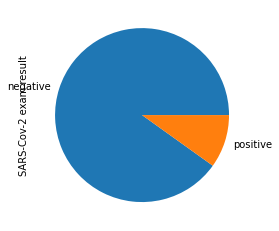

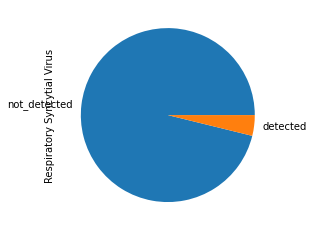

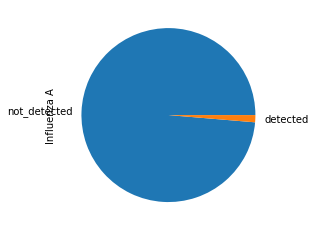

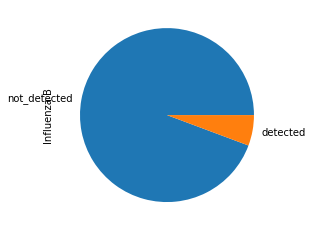

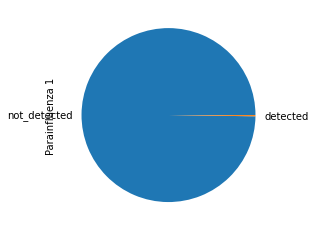

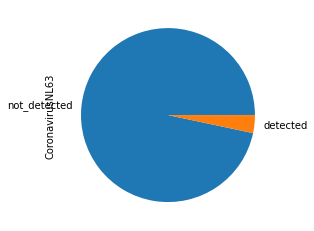

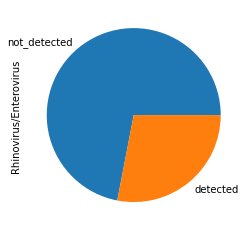

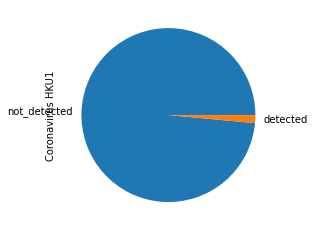

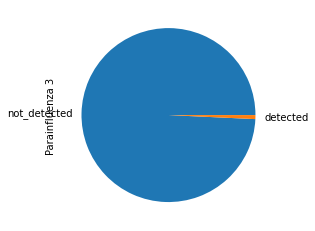

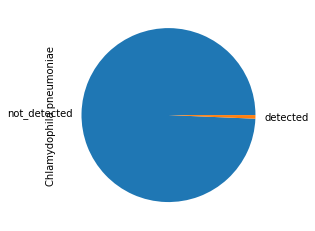

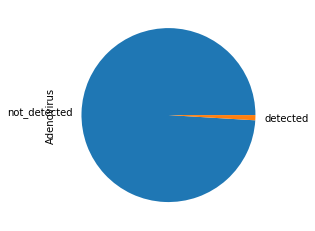

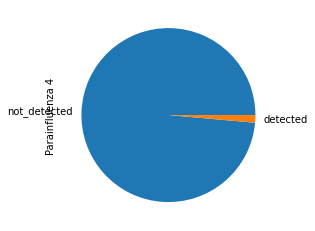

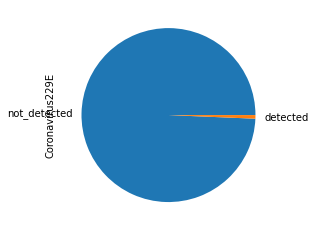

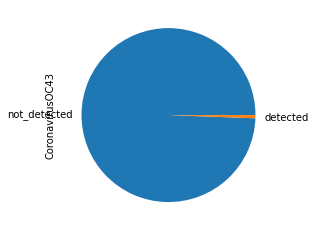

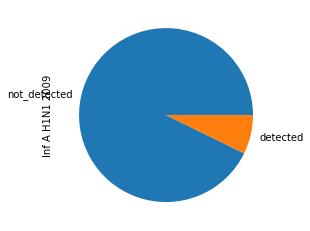

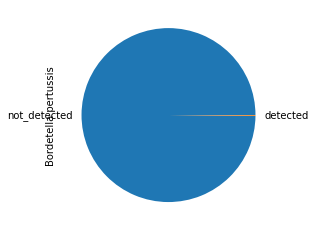

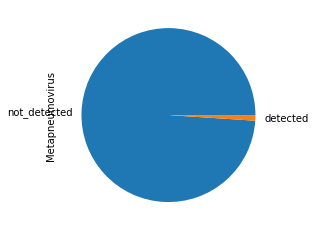

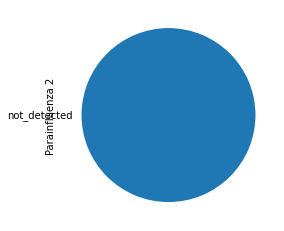

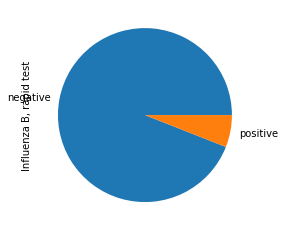

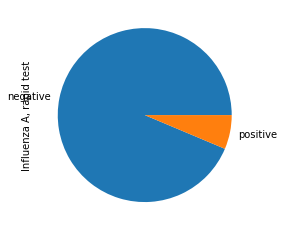

In [19]:
for col in df.select_dtypes("object"):
    plt.figure()
    df[col].value_counts().plot.pie()

# Relation Target/Variables

In [20]:
###Création de sous-ensembles positifs et négatifs

In [21]:
positive_df=df[df["SARS-Cov-2 exam result"]=="positive"]

In [22]:
negative_df=df[df["SARS-Cov-2 exam result"]=="negative"]

In [23]:
###Création des ensembles Blood et viral

In [24]:
missing_rate=df.isna().sum()/df.shape[0]

In [25]:
blood_columns=df.columns[(missing_rate<0.9) & (missing_rate>0.88)]

In [26]:
viral_columns=df.columns[(missing_rate<0.88) & (missing_rate>0.75)]

In [27]:
##Target/Blood

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

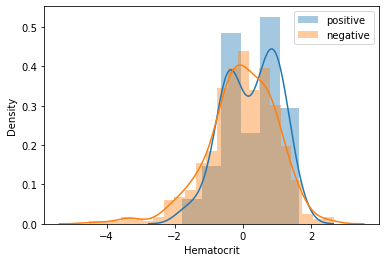

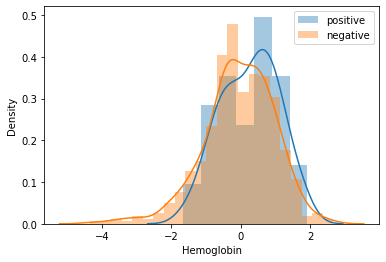

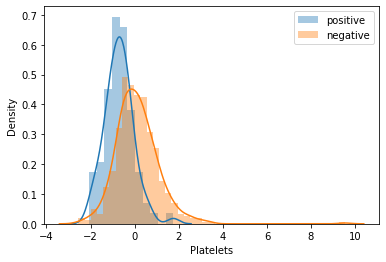

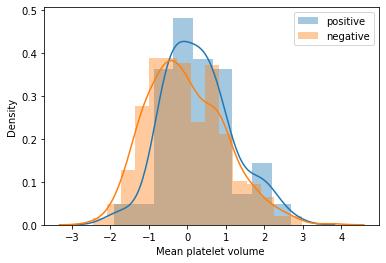

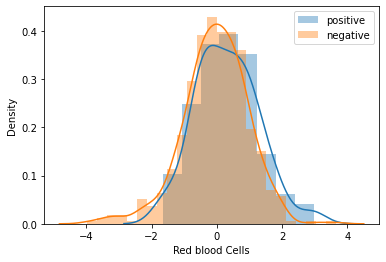

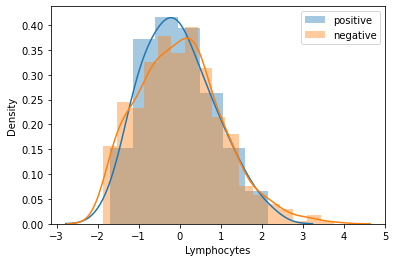

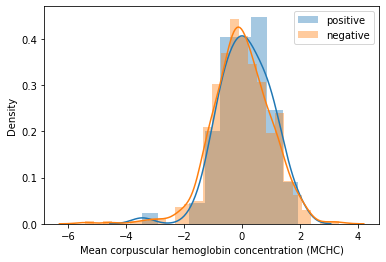

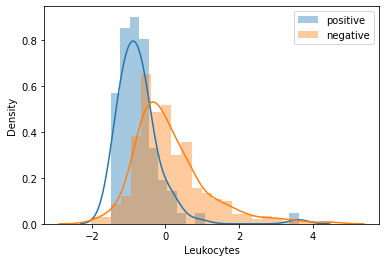

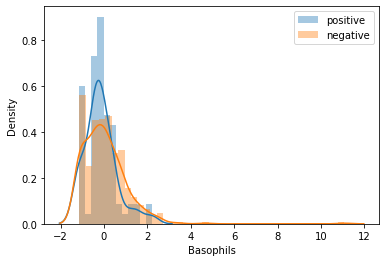

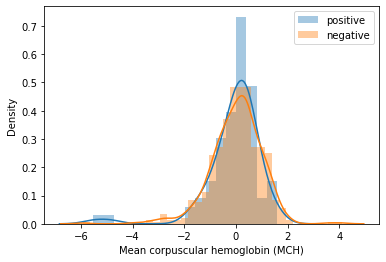

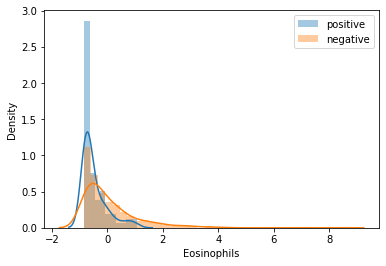

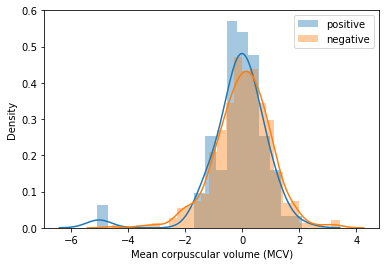

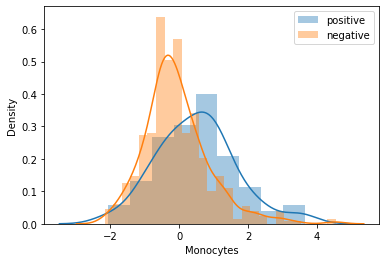

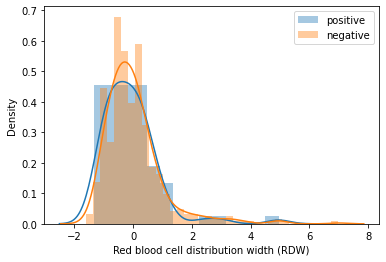

In [28]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col],label="positive")
    sns.distplot(negative_df[col],label="negative")
    plt.legend()

In [29]:
#Relation Target/age

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

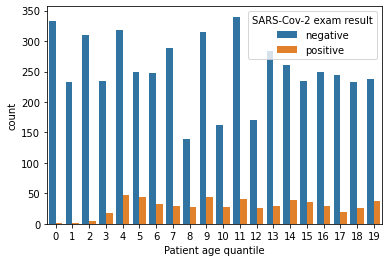

In [30]:
sns.countplot(x="Patient age quantile",hue="SARS-Cov-2 exam result",data=df)

In [31]:
# Relation Target/viral

In [32]:
pd.crosstab(df["SARS-Cov-2 exam result"],df["Influenza A"])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

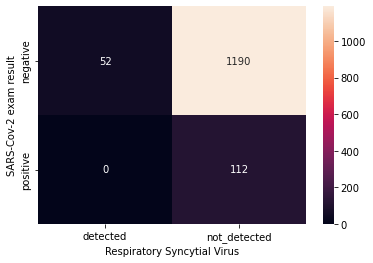

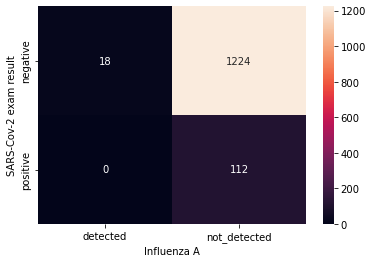

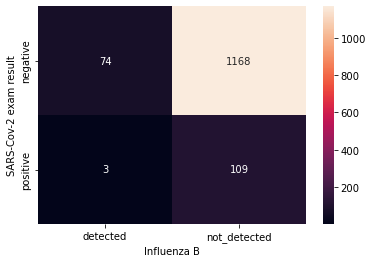

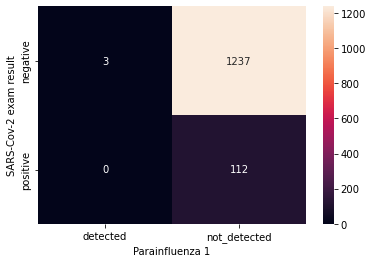

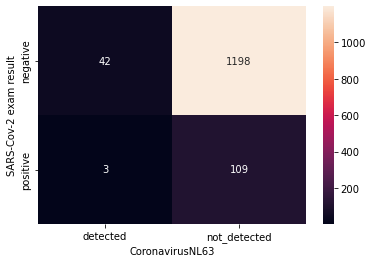

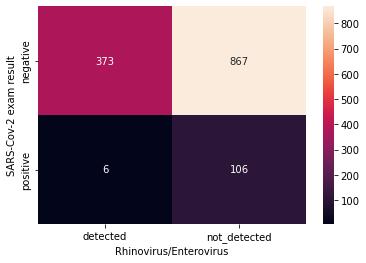

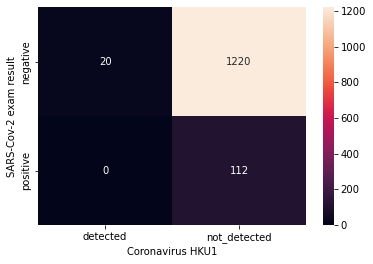

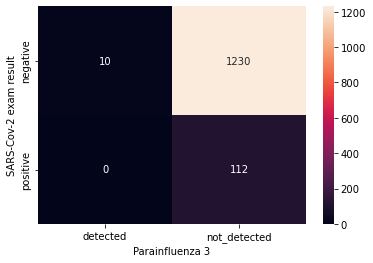

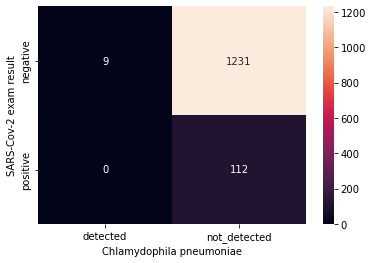

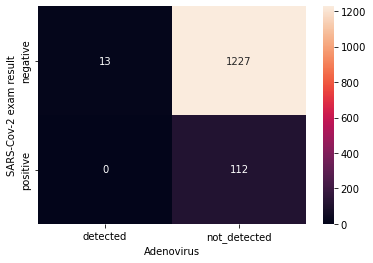

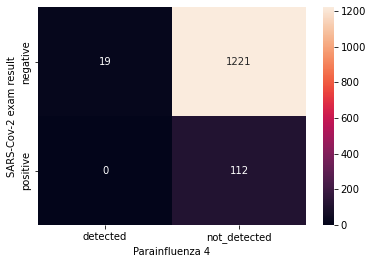

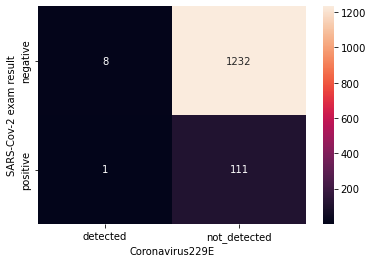

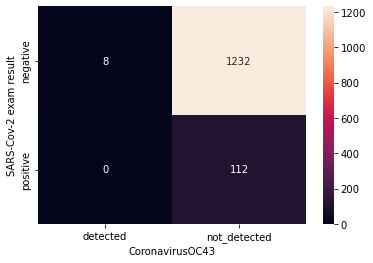

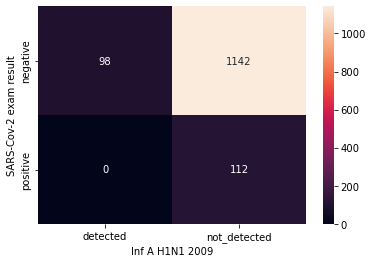

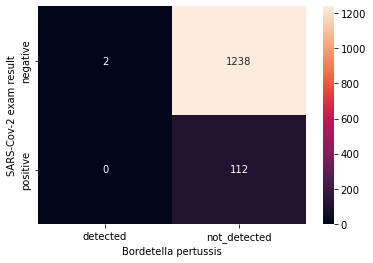

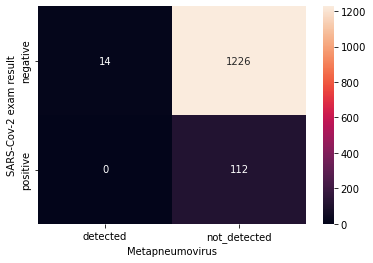

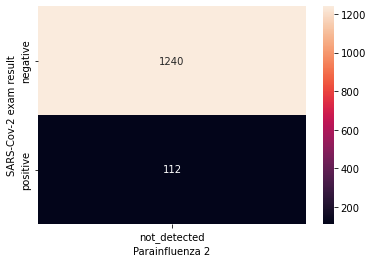

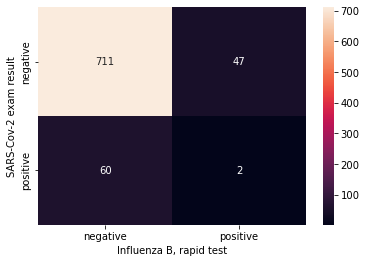

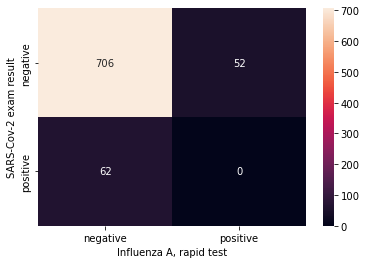

In [33]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df["SARS-Cov-2 exam result"],df[col]),annot=True,fmt="d")

# Relation variables/variables

In [34]:
#relation Taux Sanguin

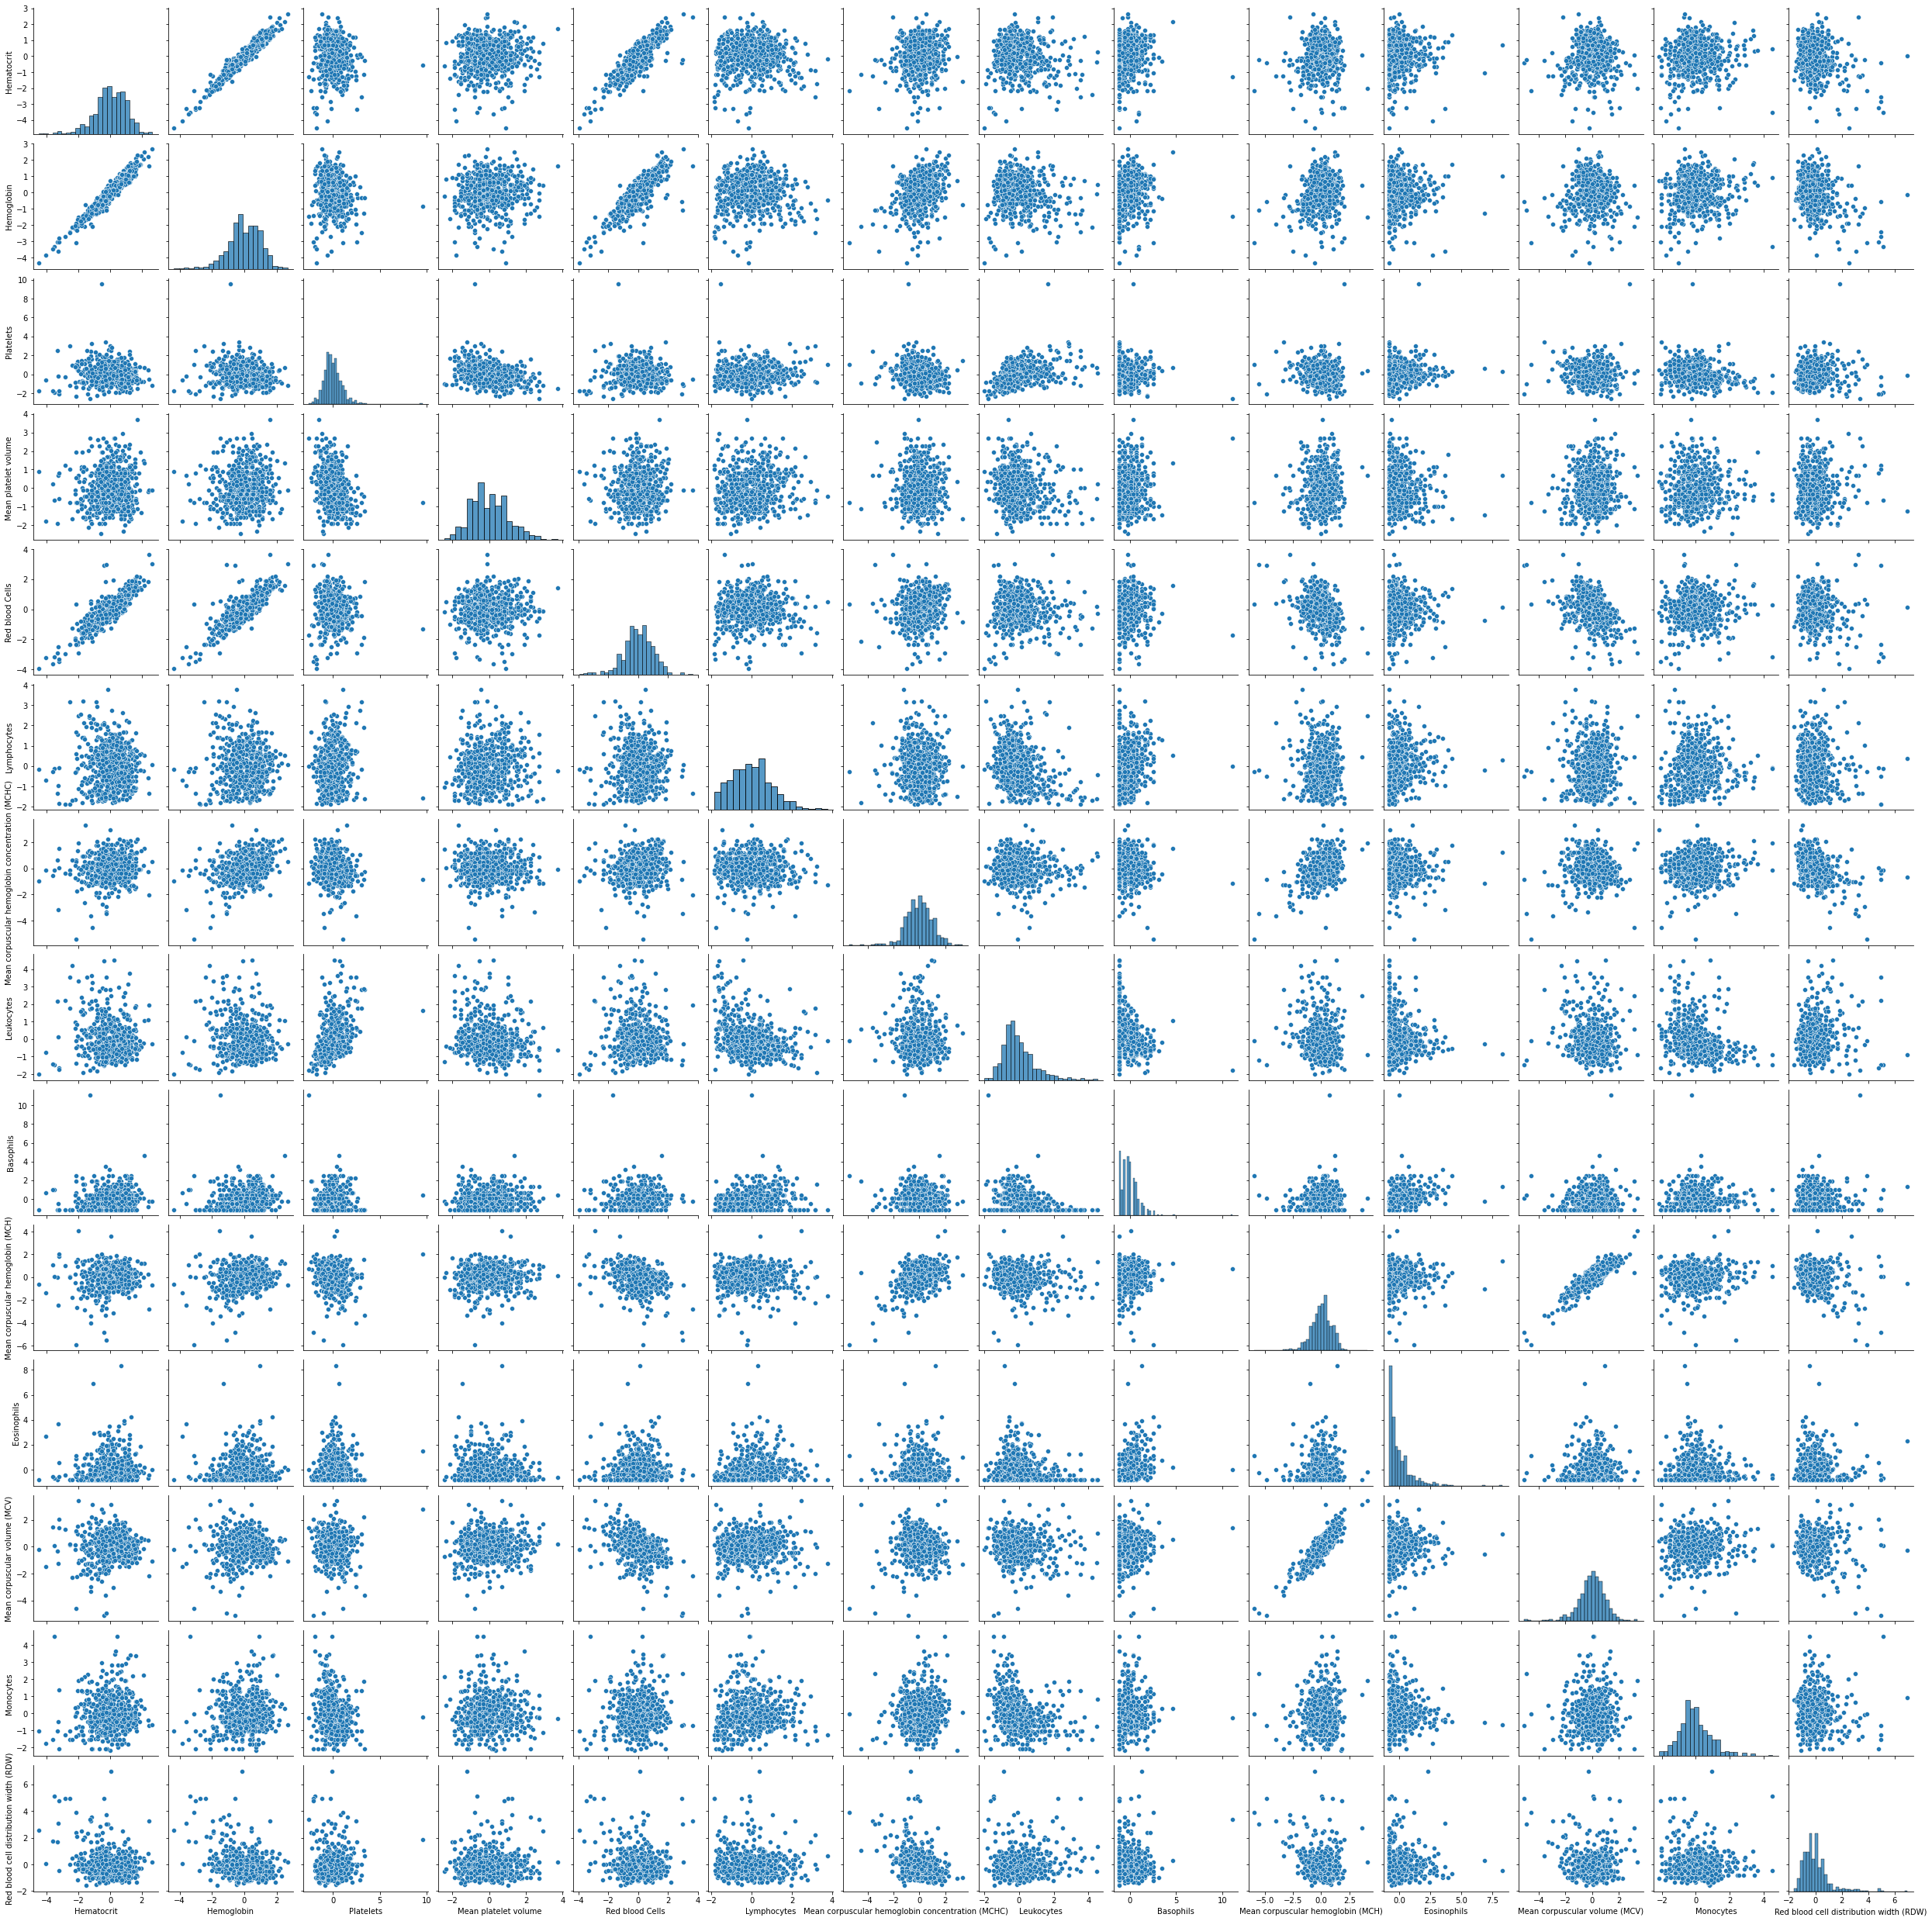

In [35]:
sns.pairplot(df[blood_columns])

<AxesSubplot:>

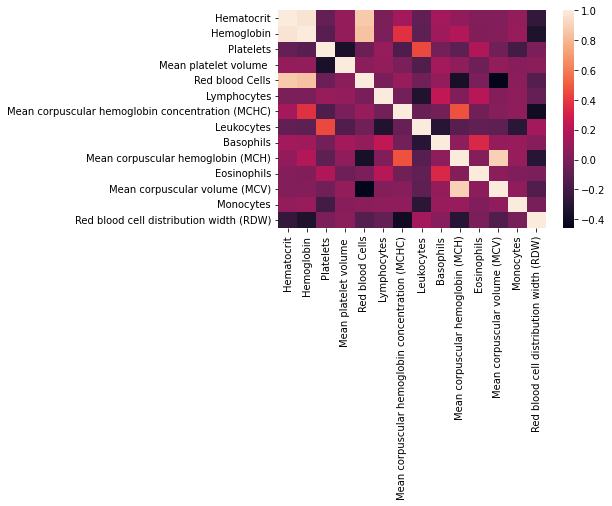

In [208]:
sns.heatmap(df[blood_columns].corr())

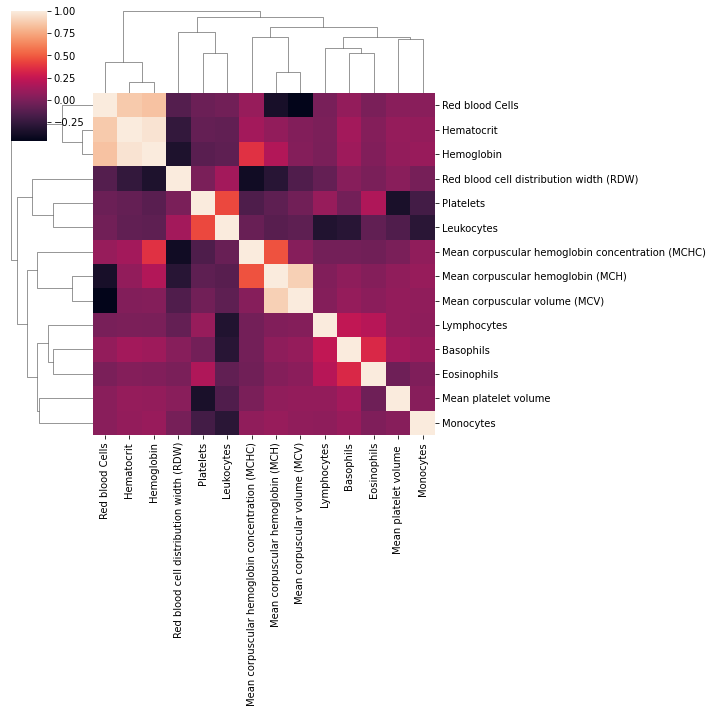

In [209]:
sns.clustermap(df[blood_columns].corr())

In [210]:
#relation Age/sang

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_13756/3635364982.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

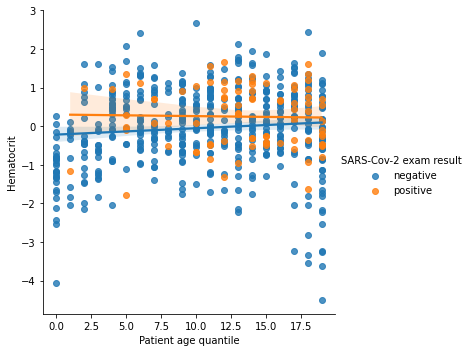

<Figure size 432x288 with 0 Axes>

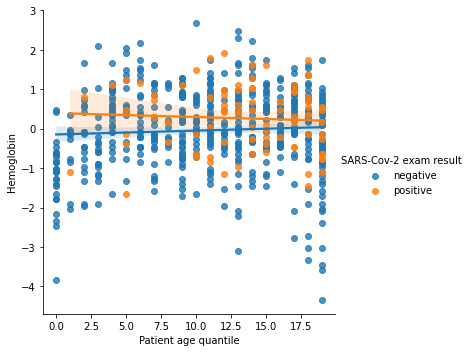

<Figure size 432x288 with 0 Axes>

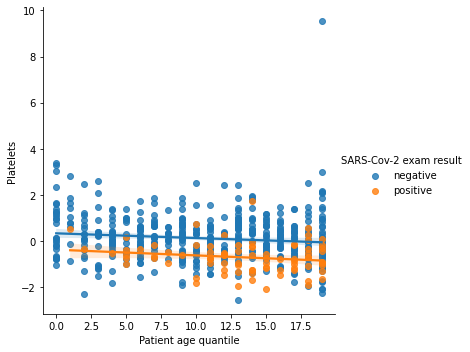

<Figure size 432x288 with 0 Axes>

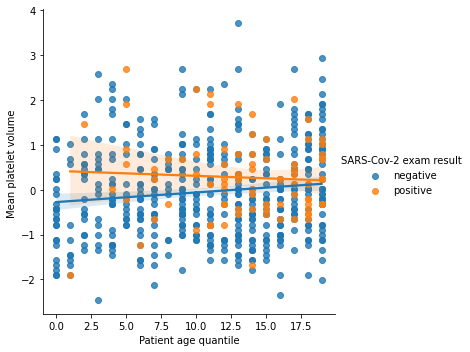

<Figure size 432x288 with 0 Axes>

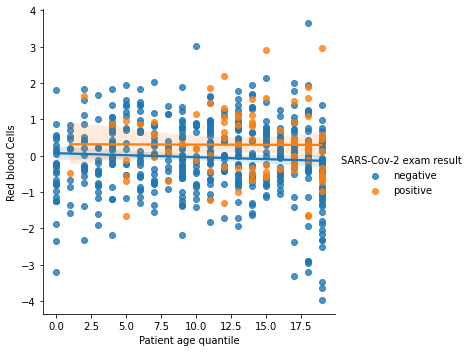

<Figure size 432x288 with 0 Axes>

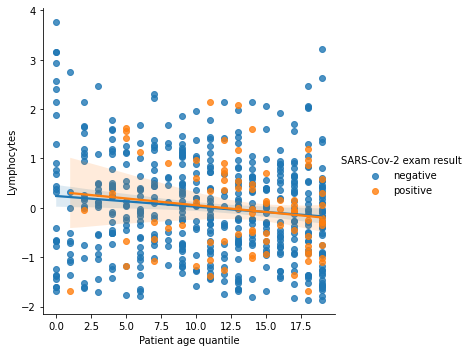

<Figure size 432x288 with 0 Axes>

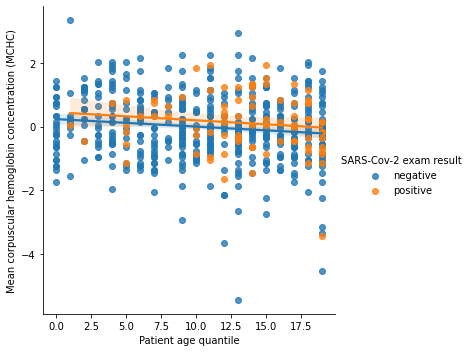

<Figure size 432x288 with 0 Axes>

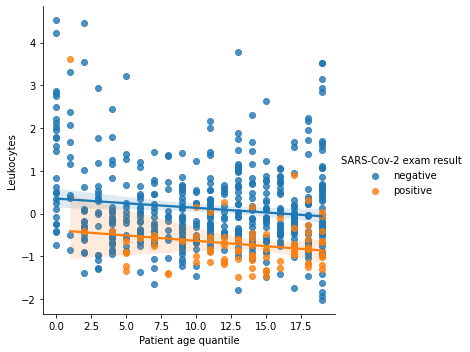

<Figure size 432x288 with 0 Axes>

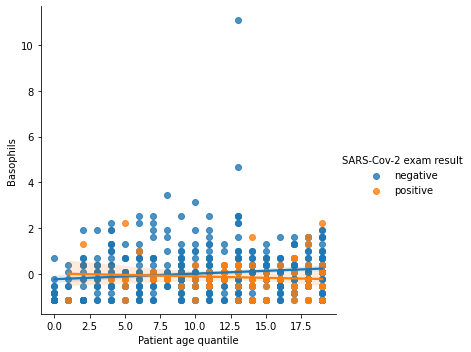

<Figure size 432x288 with 0 Axes>

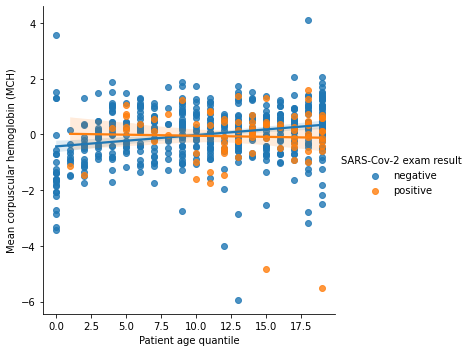

<Figure size 432x288 with 0 Axes>

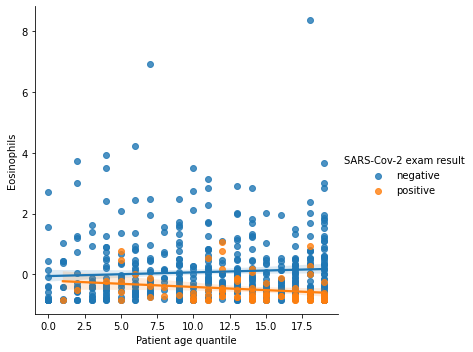

<Figure size 432x288 with 0 Axes>

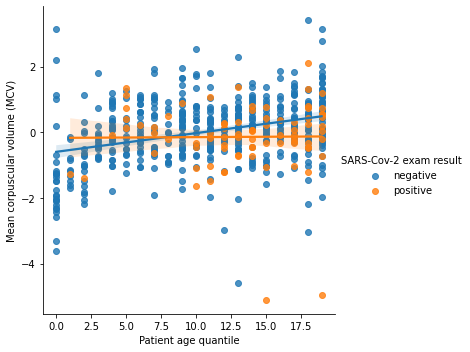

<Figure size 432x288 with 0 Axes>

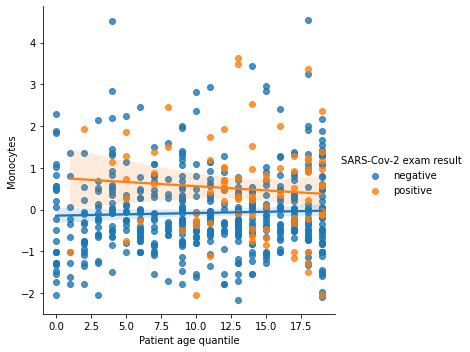

<Figure size 432x288 with 0 Axes>

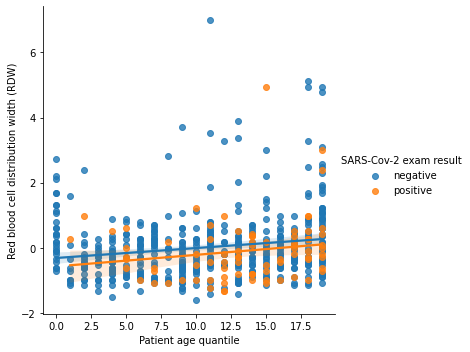

In [211]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x="Patient age quantile",y=col,hue="SARS-Cov-2 exam result", data=df)

In [212]:
df.corr()["Patient age quantile"].sort_values()
#Tres faible corrélation age/sang

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [213]:
#Relation Ifluenza / Rapid test

In [214]:
pd.crosstab(df["Influenza A"],df["Influenza A, rapid test"])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [215]:
pd.crosstab(df["Influenza B"],df["Influenza B, rapid test"])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [216]:
#Relation Maladie/blood data

In [217]:
df["est malade"]=np.sum(df[viral_columns[:-2]]== "detected",axis=1)>=1 #on élimine les 2 dernières colonnes

In [218]:
malade_df=df[df["est malade"]==True]
non_malade_df=df[df["est malade"]==False]

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

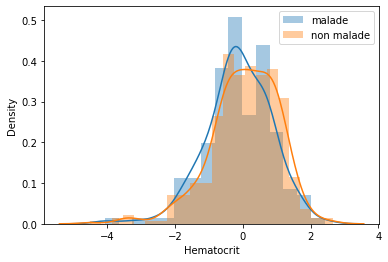

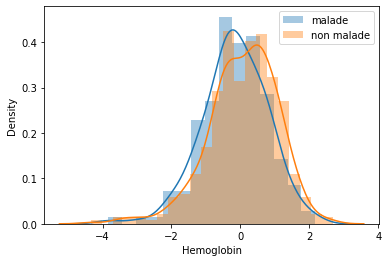

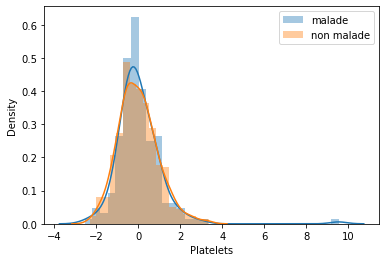

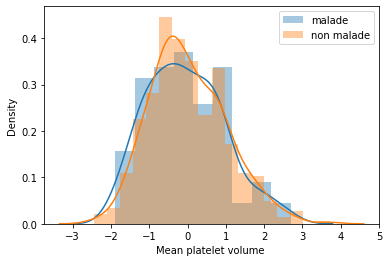

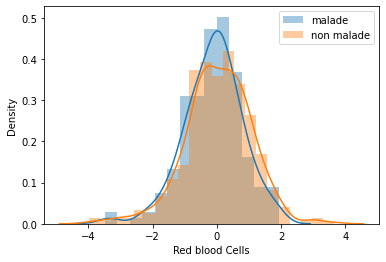

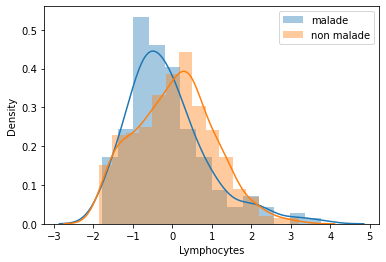

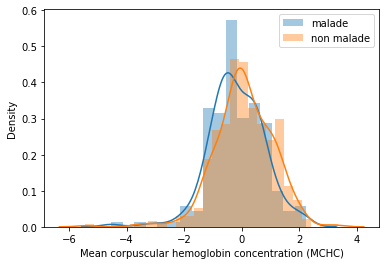

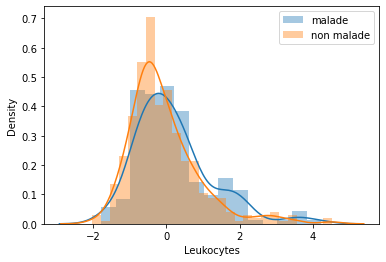

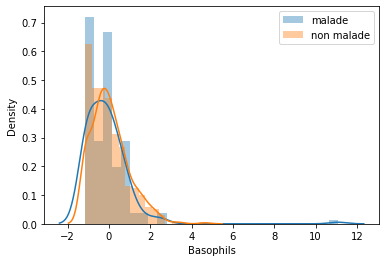

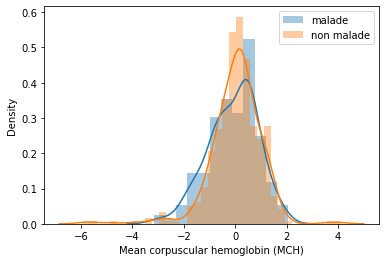

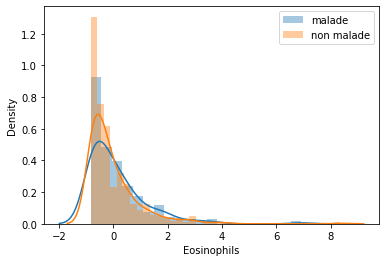

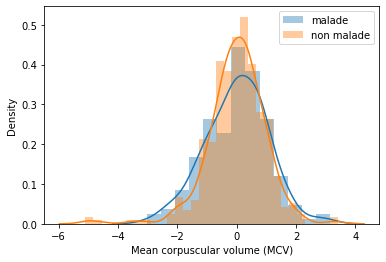

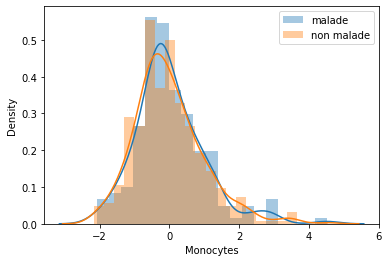

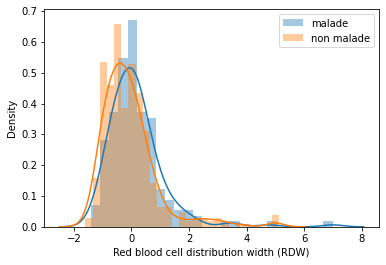

In [219]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col],label="malade")
    sns.distplot(non_malade_df[col],label="non malade")
    plt.legend()

In [220]:
def hospitalisation(df):
    if df["Patient addmited to regular ward (1=yes, 0=no)"]==1:
        return "surveillance"
    if df["Patient addmited to semi-intensive unit (1=yes, 0=no)"]==1:
        return "soins semi-intensif"
    if df["Patient addmited to intensive care unit (1=yes, 0=no)"]==1:
        return "soins intensifs"
    else:
        return "inconnu"
    

In [221]:
df["statut"]= df.apply(hospitalisation, axis=1)

In [222]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

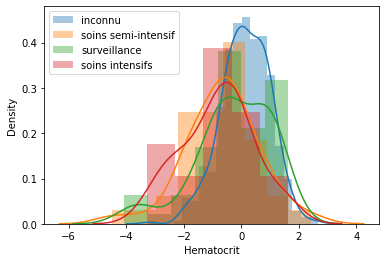

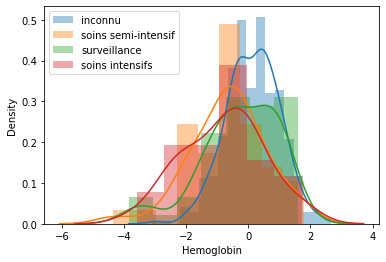

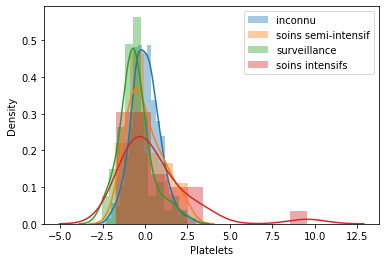

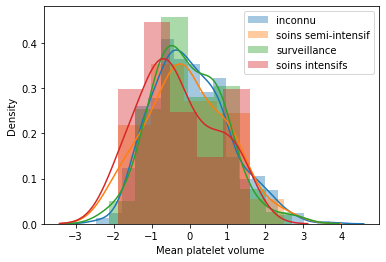

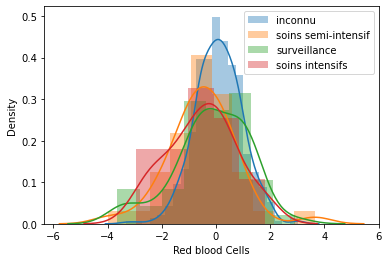

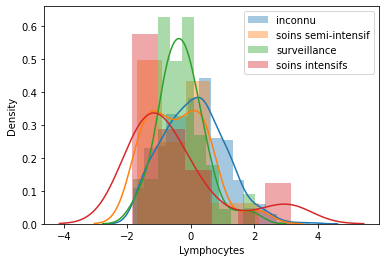

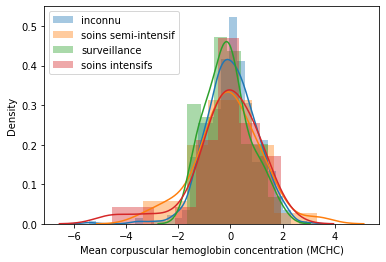

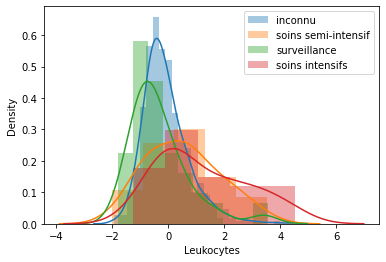

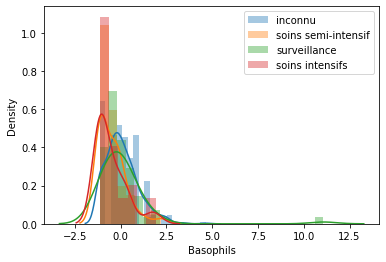

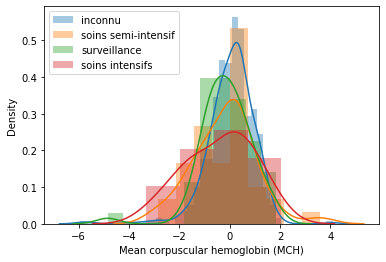

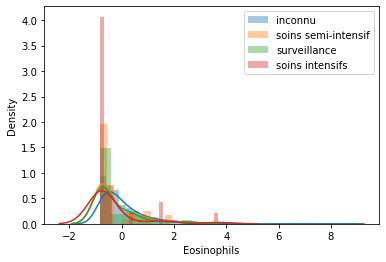

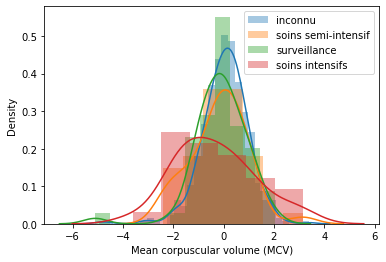

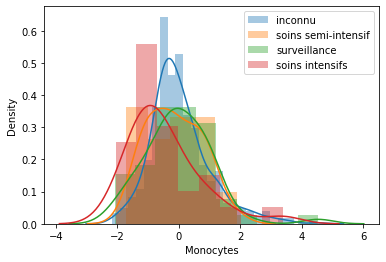

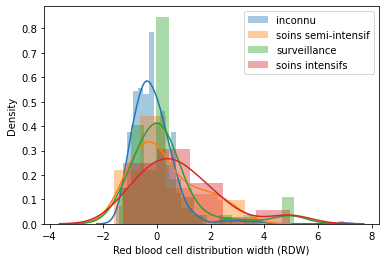

In [223]:
for col in blood_columns:
    plt.figure()
    for cat in df["statut"].unique():
        sns.distplot(df[df["statut"]==cat][col],label=cat)
    
    plt.legend()

# NaN analyse

In [224]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [225]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [226]:
df1=df[viral_columns[:-2]]
df1["covid"]=df["SARS-Cov-2 exam result"]
df1.dropna()["covid"].value_counts(normalize=True)

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_13756/45005189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["covid"]=df["SARS-Cov-2 exam result"]


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [227]:
df2=df[blood_columns]
df2["covid"]=df["SARS-Cov-2 exam result"]
df2.dropna()["covid"].value_counts(normalize=True)

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_13756/2202985417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["covid"]=df["SARS-Cov-2 exam result"]


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

# Test d'hypothèses

In [228]:
#HO = les taux moyens sont EGAUX chez les individus positifs et négatifs

In [229]:
#T-Test

In [230]:
from scipy.stats import ttest_ind

In [231]:
balanced_neg=negative_df.sample(positive_df.shape[0]) #Extraires aux hasard 558 échantillons

In [232]:
def t_test(col):
    alpha=0.02
    stat,p=ttest_ind(balanced_neg[col].dropna(),positive_df[col].dropna())
    if p < alpha:
        return "H0 Rejetée"
    else:
        return 0

In [233]:
for col in blood_columns:
    print(f"{col :-<50}{t_test(col)}")

Hematocrit----------------------------------------H0 Rejetée
Hemoglobin----------------------------------------H0 Rejetée
Platelets-----------------------------------------H0 Rejetée
Mean platelet volume -----------------------------0
Red blood Cells-----------------------------------H0 Rejetée
Lymphocytes---------------------------------------0
Mean corpuscular hemoglobin concentration (MCHC)--0
Leukocytes----------------------------------------H0 Rejetée
Basophils-----------------------------------------H0 Rejetée
Mean corpuscular hemoglobin (MCH)-----------------0
Eosinophils---------------------------------------H0 Rejetée
Mean corpuscular volume (MCV)---------------------0
Monocytes-----------------------------------------0
Red blood cell distribution width (RDW)-----------0


In [234]:
#L'hypothèse est rejetée 

# Pre-processing

In [36]:
df = data.copy()

# Création des sous-ensembles (suite EDA)

In [37]:
missing_rate=df.isna().sum()/df.shape[0]

In [38]:
blood_columns=list(df.columns[(missing_rate<0.9)&(missing_rate>0.88)])
viral_columns=list(df.columns[(missing_rate<0.80)&(missing_rate>0.75)])

In [39]:
key_columns=["Patient age quantile","SARS-Cov-2 exam result"]

In [40]:
df=df[key_columns+blood_columns+viral_columns]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

# TrainTest-Nettoyage-Encodage

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
trainset, testset=train_test_split(df,test_size=0.2,random_state=0)

In [87]:
trainset["SARS-Cov-2 exam result"].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [88]:
testset["SARS-Cov-2 exam result"].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

# Encodage

In [89]:
def encodage(df):
    code={"positive":1,
      "negative":0,
      "detected":1,
      "not_detected":0}
    for col in df.select_dtypes("object").columns:
        df.loc[:,col]=df[col].map(code)
    
    return df

In [90]:
def feature_engineering(df):
    df["est malade"]=df[viral_columns].sum(axis=1) >=1
    df=df.drop(viral_columns,axis=1)
    return df

In [91]:
def imputation(df):
    #df["is na"]=(df["Parainfluenza 3"].isna() | df["Leukocytes"].isna())
    #df=df.fillna(-999)
    df=df.dropna(axis=0)
    
    return df

In [92]:
def preprocessing(df):
    df=encodage(df)
    df=feature_engineering(df)
    df=imputation(df)
    
    X=df.drop("SARS-Cov-2 exam result",axis=1)
    y=df["SARS-Cov-2 exam result"]
    
    print(y.value_counts())
         
    return X,y

In [93]:
X_train, y_train=preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [94]:
X_test, y_test=preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


# Modélisation

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [96]:
preprocessor= make_pipeline(PolynomialFeatures(2, include_bias=False),SelectKBest(f_classif, k=10))

In [97]:
RandomForest=make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM=make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0))
KNN=make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())

In [98]:
dict_of_models={"RandomForest":RandomForest,
                "AdaBoost":AdaBoost,
                "SVM":SVM,
                "KNN":KNN
               }

RandomForest
Matrix de confusion [[91  4]
 [11  5]]
Report Classification               precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

AdaBoost
Matrix de confusion [[91  4]
 [ 9  7]]
Report Classification               precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111

SVM
Matrix de confusion [[92  3]
 [10  6]]
Report Classification               precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67     

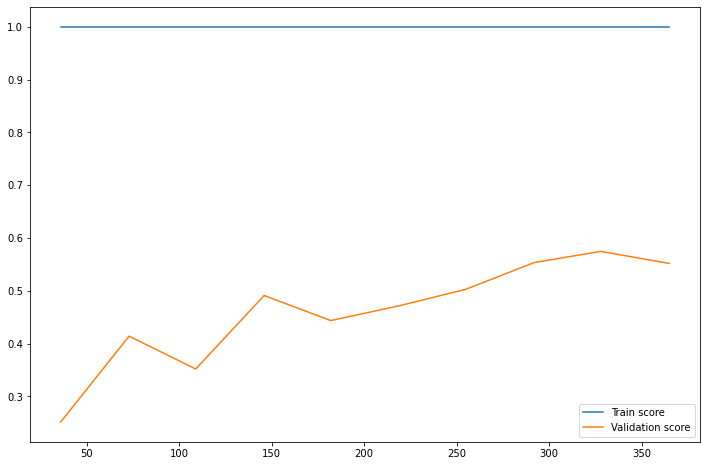

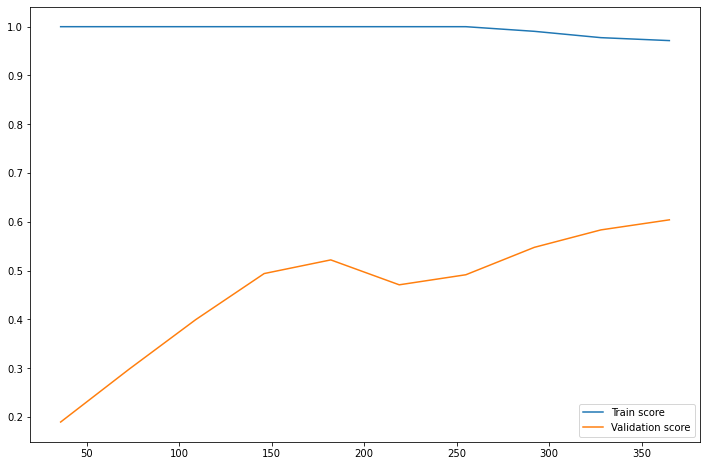

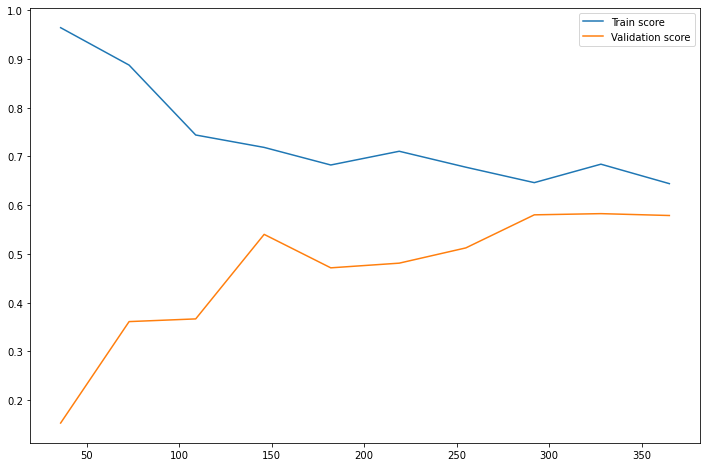

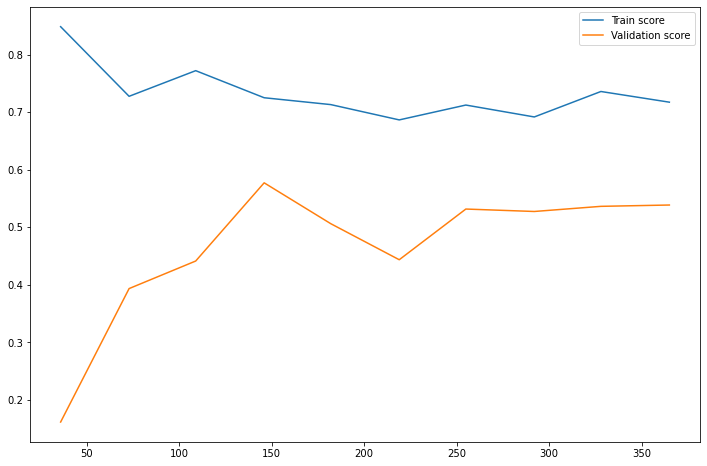

In [99]:
for name, model in list_of_models.items():
    print(name)
    evaluation(model)

# Procédure d'évaluation

In [100]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [101]:
def evaluation(model):
    
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    
    print(f"Matrix de confusion {confusion_matrix(y_test,ypred)}")
    print(f"Report Classification {classification_report(y_test,ypred)}")
    
    N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,train_sizes=np.linspace(0.1,1,10),
                                            scoring="f1")
    
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label="Train score")
    plt.plot(N,val_score.mean(axis=1),label="Validation score")
    plt.legend()

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Matrix de confusion [[91  4]
 [11  5]]
Report Classification               precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." %

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." %

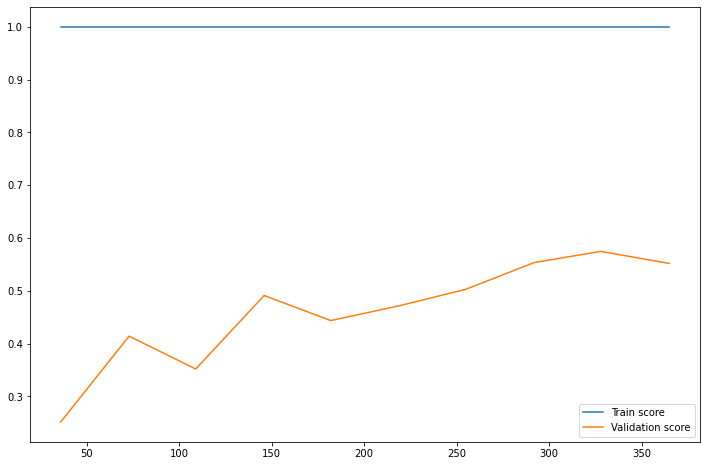

In [417]:
evaluation(model)

In [102]:
pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

# Optimisation

In [108]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [109]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [115]:
hyper_params={"svc__gamma":[1e-3, 1e-4],
              "svc__C":[1,10,100,1000],
              "pipeline__polynomialfeatures__degree":[2,3,4],
              "pipeline__selectkbest__k":range(40,60)
}

In [116]:
grid = RandomizedSearchCV(SVM,hyper_params,scoring="recall",cv=4, n_iter=100)
grid.fit(X_train,y_train)
print(grid.best_params_)

y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 51, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        95
           1       0.57      0.50      0.53        16

    accuracy                           0.87       111
   macro avg       0.74      0.72      0.73       111
weighted avg       0.87      0.87      0.87       111



Matrix de confusion [[89  6]
 [ 8  8]]
Report Classification               precision    recall  f1-score   support

           0       0.92      0.94      0.93        95
           1       0.57      0.50      0.53        16

    accuracy                           0.87       111
   macro avg       0.74      0.72      0.73       111
weighted avg       0.87      0.87      0.87       111



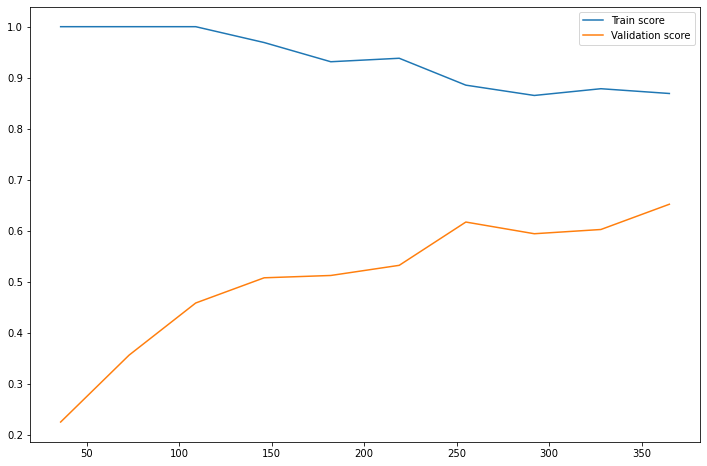

In [117]:
evaluation(grid.best_estimator_)

# Precision Recall Curve

In [118]:
from sklearn.metrics import precision_recall_curve

In [122]:
precision, recall,threshold=precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

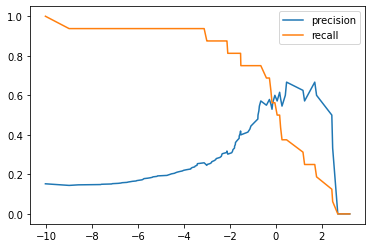

In [123]:
plt.plot(threshold,precision[:-1],label="precision")
plt.plot(threshold,recall[:-1],label="recall")
plt.legend()

In [124]:
def model_final(model,X,threshold=0):
    return model.decision_function(X) > threshold

In [125]:
y_pred= model_final(grid.best_estimator_,X_test,threshold=-1)

In [128]:
from sklearn.metrics import recall_score

In [126]:
f1_score(y_test,y_pred)

0.5714285714285714

In [129]:
recall_score(y_test,y_pred)

0.75